# Stock Data Cleaning & Preliminary Analysis

## Introduction

In this project, we will be working on a data science project for the finance industry. This notebook will be mainly focused on loading datasets, cleaning datasets, and preprocessing datasets. The subsequent notebooks will be using our saved and cleaned datasets for modelling. Our goal for this project is: "Can we use data science and machine learning models to help us predict prices for our specified financial instrument?". In our case, we will be focusing on stocks and indexes. As our project works on predictions, the models that we will use will produce a regression output. 

## Loading in Data and Checking Dataframes

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import glob


In [4]:
datasets = glob.glob("C:/Users/linwi/Documents/Stock_test/Datasets/*.csv")
datasets

['C:/Users/linwi/Documents/Stock_test/Datasets\\sp500_companies.csv',
 'C:/Users/linwi/Documents/Stock_test/Datasets\\sp500_index.csv',
 'C:/Users/linwi/Documents/Stock_test/Datasets\\sp500_stocks.csv']

In [5]:
dfs = []
for file in datasets:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Append the DataFrame to the list
    dfs.append(df)

In [6]:
dfs #Checking if all the dataframes are in the list 

[    Exchange Symbol                  Shortname  \
 0        NMS   MSFT      Microsoft Corporation   
 1        NMS   AAPL                 Apple Inc.   
 2        NMS   NVDA         NVIDIA Corporation   
 3        NMS   AMZN           Amazon.com, Inc.   
 4        NMS   GOOG              Alphabet Inc.   
 ..       ...    ...                        ...   
 497      NYQ   GNRC     Generac Holdlings Inc.   
 498      NYQ    CMA      Comerica Incorporated   
 499      NYQ    VFC           V.F. Corporation   
 500      NYQ    WHR      Whirlpool Corporation   
 501      NMS   ZION  Zions Bancorporation N.A.   
 
                                        Longname                  Sector  \
 0                         Microsoft Corporation              Technology   
 1                                    Apple Inc.              Technology   
 2                            NVIDIA Corporation              Technology   
 3                              Amazon.com, Inc.       Consumer Cyclical   
 4    

In [7]:
sp500_df = dfs[1].copy() #Slicing out the S&P500 dataframe and making a copy.

In [8]:
sp500_df

,Date,S&P500
0,2014-03-03,1845.73
1,2014-03-04,1873.91
2,2014-03-05,1873.81
3,2014-03-06,1877.03
4,2014-03-07,1878.04
...,...,...
2513,2024-02-26,5069.53
2514,2024-02-27,5078.18
2515,2024-02-28,5069.76
2516,2024-02-29,5096.27


We can see that the sp500_df has two columns: `Date` and `S&P500`

In [9]:
company_df = dfs[0].copy() #Slicing out the company dataframe and making a copy.

In [10]:
company_df

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,415.50,3087347744768,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064953
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,179.66,2774291709952,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.058367
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,822.79,2056974893056,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.043276
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,178.22,1851242446848,8.551500e+10,0.139,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038947
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,138.08,1710397063168,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.035984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,NYQ,GNRC,Generac Holdlings Inc.,Generac Holdings Inc.,Industrials,Specialty Industrial Machinery,114.18,6881548800,5.532610e+08,0.014,Waukesha,WI,United States,8315.0,"Generac Holdings Inc. designs, manufactures, a...",0.000145
498,NYQ,CMA,Comerica Incorporated,Comerica Incorporated,Financial Services,Banks - Regional,49.59,6540822016,NaN,-0.220,Dallas,TX,United States,7701.0,"Comerica Incorporated, through its subsidiarie...",0.000138
499,NYQ,VFC,V.F. Corporation,V.F. Corporation,Consumer Cyclical,Apparel Manufacturing,16.24,6314371584,1.068373e+09,-0.162,Denver,CO,United States,19800.0,"V.F. Corporation, together with its subsidiari...",0.000133
500,NYQ,WHR,Whirlpool Corporation,Whirlpool Corporation,Consumer Cyclical,"Furnishings, Fixtures & Appliances",106.81,5836504064,1.477000e+09,0.034,Benton Harbor,MI,United States,59000.0,Whirlpool Corporation manufactures and markets...,0.000123


The company_df contains fundamental information of the companies in the S&P500. Its categories are: `Exchange`,`Symbol`,`Shortname`,`Longname`, `Sector`, `Industry`,`Currentprice`, `Marketcap`, `Ebitda`, `Revenuegrowth`, `City`, `State`, `Country`, `Fulltimeemployees`, `Longbusinesssummary` and `Weight`.

In [11]:
stocks_df = dfs[2].copy()

In [12]:
stocks_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,53.295380,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,52.961567,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,53.712662,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,53.751194,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,54.129951,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...,...
1792687,2024-02-26,ZTS,197.039993,197.039993,197.990005,195.460007,196.899994,2098500.0
1792688,2024-02-27,ZTS,199.000000,199.000000,199.250000,194.039993,197.649994,1982500.0
1792689,2024-02-28,ZTS,199.940002,199.940002,200.500000,197.100006,199.300003,2003300.0
1792690,2024-02-29,ZTS,198.330002,198.330002,200.529999,198.190002,200.500000,2849200.0


The stocks_df has `Date`, `Symbol`, `Adj Close`, `Close`, `High`, `Low` , `Open`, and `Volume` 

**Checking the datatypes in each dataframe.**

In [13]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792692 entries, 0 to 1792691
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 109.4+ MB


In [14]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        501 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    470 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               502 non-null    flo

In [15]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2518 non-null   object 
 1   S&P500  2518 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


## Data Cleaning 

In [16]:
print(stocks_df.isna().sum())

Date             0
Symbol           0
Adj Close    79913
Close        79913
High         79913
Low          79913
Open         79913
Volume       79913
dtype: int64


In [17]:
print(sp500_df.isna().sum())

Date      0
S&P500    0
dtype: int64


In [18]:
print(company_df.isna().sum())

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           1
City                    0
State                  20
Country                 0
Fulltimeemployees      32
Longbusinesssummary     0
Weight                  0
dtype: int64


We can see that there are 79,913 null values in the stocks_df.
There are no null values in the sp500_df.
There are some null values for the company_df.

Let's first look at the null values for the stocks_df.

In [19]:
stocks_null = stocks_df.isna().any(axis=1)
stocks_null_rows = stocks_df[stocks_null]
print(stocks_null_rows)

               Date Symbol  Adj Close  Close  High  Low  Open  Volume
10692    2010-01-04   ABBV        NaN    NaN   NaN  NaN   NaN     NaN
10693    2010-01-05   ABBV        NaN    NaN   NaN  NaN   NaN     NaN
10694    2010-01-06   ABBV        NaN    NaN   NaN  NaN   NaN     NaN
10695    2010-01-07   ABBV        NaN    NaN   NaN  NaN   NaN     NaN
10696    2010-01-08   ABBV        NaN    NaN   NaN  NaN   NaN     NaN
...             ...    ...        ...    ...   ...  ...   ...     ...
1789898  2013-01-25    ZTS        NaN    NaN   NaN  NaN   NaN     NaN
1789899  2013-01-28    ZTS        NaN    NaN   NaN  NaN   NaN     NaN
1789900  2013-01-29    ZTS        NaN    NaN   NaN  NaN   NaN     NaN
1789901  2013-01-30    ZTS        NaN    NaN   NaN  NaN   NaN     NaN
1789902  2013-01-31    ZTS        NaN    NaN   NaN  NaN   NaN     NaN

[79913 rows x 8 columns]


The null values look like they are the same across each row and column. As these null values are present in records that we will not be using for modelling, we will not be filling in the null values with averages or filling them in with the assistance of APIs. The stock that we are interested in modelling is GOOG and it does not contain any null values. (Created a GOOG dataframe below and checked for null values)

In [20]:
company_null = company_df.isna().any(axis=1)
company_null_rows = company_df[company_null]
print(company_null_rows)

    Exchange Symbol                        Shortname  \
11       NYQ      V                        Visa Inc.   
12       NYQ    JPM            JP Morgan Chase & Co.   
14       NYQ    UNH  UnitedHealth Group Incorporated   
16       NYQ    XOM          Exxon Mobil Corporation   
17       NYQ    JNJ                Johnson & Johnson   
..       ...    ...                              ...   
463      NYQ   ALLE                     Allegion plc   
471      NYQ   BBWI          Bath & Body Works, Inc.   
494      NMS   XRAY             DENTSPLY SIRONA Inc.   
498      NYQ    CMA            Comerica Incorporated   
501      NMS   ZION        Zions Bancorporation N.A.   

                                       Longname              Sector  \
11                                    Visa Inc.  Financial Services   
12                         JPMorgan Chase & Co.  Financial Services   
14              UnitedHealth Group Incorporated          Healthcare   
16                      Exxon Mobil Corpora

This dataframe shows us all the fundamental data for all the different companies that were listed on the S&P 500 index over the years. As we are dealing with a regression problem, we will not be using this dataframe for modelling. Although, we may be able to use it in the future if we were to do a classification project.

## S&P 500 Index Time Series Graph

We will be using the `sp500_df` to create a time-series graph to see how the price changed over the years. We will then compare the price line to the GOOG time series graph.

In [29]:
sp500_df.head() #reference 

,Date,S&P500
0,2014-03-03,1845.73
1,2014-03-04,1873.91
2,2014-03-05,1873.81
3,2014-03-06,1877.03
4,2014-03-07,1878.04


In [30]:
sp500_df.info() #checking the datatypes for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   S&P500  2518 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB


We can see that the `Date` column is an object datatype. We want to change it to a pandas datetime object. 

In [31]:
date_new =pd.to_datetime(sp500_df['Date']) #Changing the column to pandas datetime and storing it 

In [32]:
type(date_new)

pandas.core.series.Series

In [33]:
date_new.info() #Check

<class 'pandas.core.series.Series'>
RangeIndex: 2518 entries, 0 to 2517
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
2518 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 19.8 KB


In [34]:
sp500_df['Date'] = date_new #Changing the data types to datetime values

In [35]:
sp500_df.info() #Checking if it changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   S&P500  2518 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB


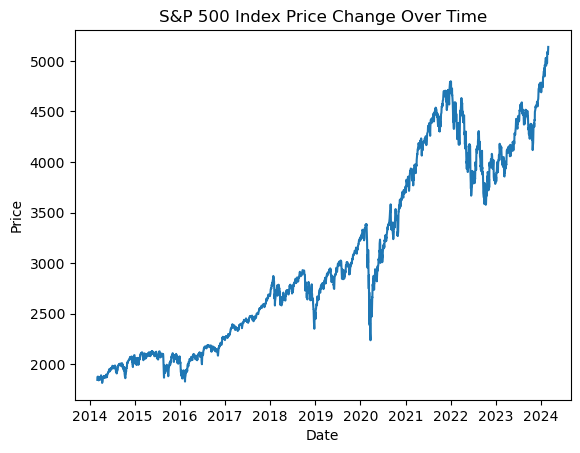

In [36]:
#Plotting the price changes for the S&P 500 index over 10 years
plt.plot(sp500_df['Date'],sp500_df['S&P500'])
plt.title("S&P 500 Index Price Change Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## Google Analysis and Graphing

We will narrow down our analysis and focus on the 'GOOG' stock and its price performance over the years. We will also be running our models on the 'GOOG' stock dataset. 

In [37]:
#Selecting only the rows with the Symbol "GOOG"
goog_df = stocks_df[stocks_df["Symbol"]== 'GOOG'].copy()
type(goog_df)

pandas.core.frame.DataFrame

In [38]:
goog_df.isna().sum() #checking if the goog dataframe has any nullvalues.

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [39]:
goog_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
71280,2010-01-04,GOOG,15.610239,15.610239,15.678981,15.547723,15.615220,78541293.0
71281,2010-01-05,GOOG,15.541497,15.541497,15.637387,15.480475,15.620949,120638494.0
71282,2010-01-06,GOOG,15.149715,15.149715,15.588072,15.102393,15.588072,159744526.0
71283,2010-01-07,GOOG,14.797037,14.797037,15.193053,14.760922,15.178109,257533695.0
71284,2010-01-08,GOOG,14.994298,14.994298,15.024933,14.672753,14.744733,189680313.0
...,...,...,...,...,...,...,...,...
74839,2024-02-26,GOOG,138.750000,138.750000,143.839996,138.740005,143.449997,33513000.0
74840,2024-02-27,GOOG,140.100006,140.100006,140.490005,138.500000,139.410004,22364000.0
74841,2024-02-28,GOOG,137.429993,137.429993,139.279999,136.639999,139.100006,30628700.0
74842,2024-02-29,GOOG,139.779999,139.779999,139.949997,137.570007,138.350006,35485000.0


In [40]:
goog_df.info() # Checking the datatypes to make sure I am able to easily manipulate them later

<class 'pandas.core.frame.DataFrame'>
Index: 3564 entries, 71280 to 74843
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3564 non-null   object 
 1   Symbol     3564 non-null   object 
 2   Adj Close  3564 non-null   float64
 3   Close      3564 non-null   float64
 4   High       3564 non-null   float64
 5   Low        3564 non-null   float64
 6   Open       3564 non-null   float64
 7   Volume     3564 non-null   float64
dtypes: float64(6), object(2)
memory usage: 250.6+ KB


The `Date` column is still an object type so we will be changing it to a panadas datatime object for easier feature manipulation.

In [35]:
goog_date =pd.to_datetime(goog_df['Date']) #Creating the conversion to datetime object and storing it in a variable 

In [36]:
goog_df['Date'] = goog_date # Apply the conversion to the original dataframe and the related column

In [37]:
goog_df.info() # Checking if the change was made 

<class 'pandas.core.frame.DataFrame'>
Index: 3564 entries, 71280 to 74843
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3564 non-null   datetime64[ns]
 1   Symbol     3564 non-null   object        
 2   Adj Close  3564 non-null   float64       
 3   Close      3564 non-null   float64       
 4   High       3564 non-null   float64       
 5   Low        3564 non-null   float64       
 6   Open       3564 non-null   float64       
 7   Volume     3564 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 250.6+ KB


### Basic Graphing for GOOG Dataframe

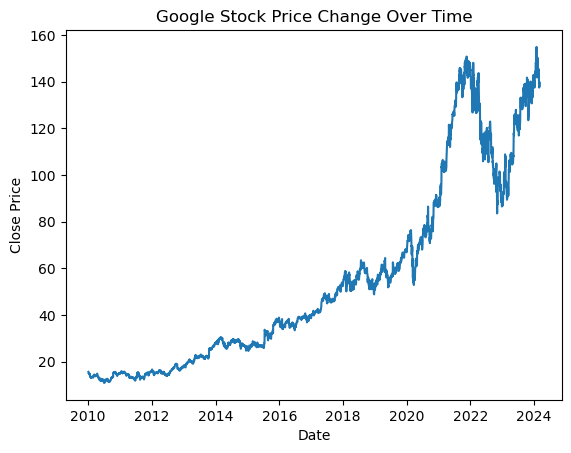

In [38]:
#Plotting the price changes for GOOG stock over 10 years. We will be using the end of day close price to plot the graph 
plt.plot(goog_df['Date'],goog_df['Close'])
plt.title("Google Stock Price Change Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


### Comparison to the S&P 500 Index

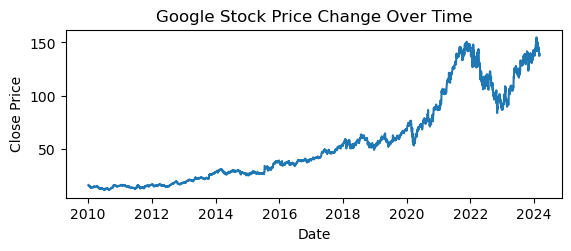

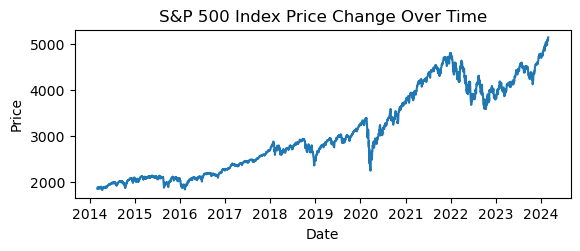

In [39]:
#Subplot one with the Google stock 
plt.figure(1)
plt.subplot(211)
plt.plot(goog_df['Date'],goog_df['Close'])
plt.title("Google Stock Price Change Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

#Subplot two with the S&P500 index 
plt.subplot(212)
plt.plot(sp500_df['Date'],sp500_df['S&P500'])
plt.title("S&P 500 Index Price Change Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

As we can see, the graphs are very similar in terms of the trend of the price. This is because Google is part of the S&P 500 so there is a high correlation between the two in terms of price movements. For instance, in the year 2020, they both dropped in price as the economy slowed down due the COVID-19 pandemic. After the pandemic, we can see that both financial instruments increased sharply as the governments had given its citizens a monthly fixed financial benefit(Eg. Canadian Emergency Response Benefit) thus driving spending in the economy.

ModuleNotFoundError: No module named 'yfinance'